## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats as st

Для исследования предоставлены несколько датасетов, рассмотрим каждый из них.

In [2]:
#открываем файл с данными
users = pd.read_csv('..../users.csv')

#вывод первых 5 строк таблицы
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [3]:
#вывод общей информации по таблице
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Таблица `users`** состоит из 8 столбцов с типами данных `int64`(2), `object`(6) и содержит информацию о 500 пользователях:
* `user_id` — уникальный идентификатор пользователя;
* `first_name` — имя пользователя;
* `last_name` — фамилия пользователя;
* `age` — возраст пользователя (годы);
* `reg_date` — дата подключения тарифа (день, месяц, год);
* `churn_date` — дата прекращения пользования тарифом;
* `city` — город проживания пользователя;
* `tariff` — название тарифного плана.

В столбце `churn_date` всего 38 строк заполнено (если значение пропущено, то тариф ещё действовал на момент выгрузки данных), т. е. наличие пропусков в этом столбце является нормальным, для удобства их можно заменить на `-`.

In [4]:
#открываем файл с данными
calls = pd.read_csv('/datasets/calls.csv')

#вывод первых 5 строк таблицы
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Таблица `calls`** состоит из 4 столбцов с типами данных `float64`(1), `int64`(1), `object`(2) и содержит информацию о 202607 звонках:
* `id` — уникальный номер звонка;
* `call_date` — дата звонка (день, месяц, год);
* `duration` — длительность звонка (в минутах);
* `user_id` — идентификатор пользователя, сделавшего звонок.

In [6]:
#открываем файл с данными
messages = pd.read_csv('/datasets/messages.csv')

#вывод первых 5 строк таблицы
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Таблица `messages`** состоит из 3 столбцов с типами данных `int64`(1), `object(2)` и содержит информацию о 123036 сообщениях:
* `id` — уникальный номер сообщения;
* `message_date` — дата сообщения (день, месяц, год);
* `user_id` — идентификатор пользователя, отправившего сообщение.

In [8]:
#открываем файл с данными
internet = pd.read_csv('/datasets/internet.csv', index_col=0)

#вывод первых 5 строк таблицы
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


**Таблица `internet`** состоит из 5 столбцов с типами данных `float64`(1), `int64`(2), `object`(2) и содержит информацию о 149396 интернет-сессиях:
* `id` — уникальный номер сессии;
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
* `session_date` — дата интернет-сессии (день, месяц, год);
* `user_id` — идентификатор пользователя.

In [10]:
#открываем файл с данными
tariffs = pd.read_csv('/datasets/tariffs.csv')

#вывод первых 5 строк таблицы
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Таблица `tariffs`** состоит из 8 столбцов с типами данных `int64`(7), `object`(1) и содержит информацию о тарифах:
* `tariff_name` — название тарифа;
* `rub_monthly_fee` — ежемесячная абонентская плата (в рублях);
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* `rub_per_message`— стоимость отправки сообщения сверх тарифного пакета;
* `rub_per_gb`— стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

По описаниям столбцов таблиц выше, есть такие (`reg_date`, `call_date`, `message_date`, `session_date`), в которых тип данных по факту `object`, но логичнее исправить на формат `datetime`, т.к. они содержат дату.

<div style="border:solid green 1px; padding: 10px">

В каждой таблице содержатся данные о пользователях: кто они, откуда, каким тарифом пользуются, сколько мегабайт интернета потратили, сколько сделали звонков и сообщений отправили за 2018 год.

Предварительно можно утверждать, что, данных достаточно для сравнения тарифов Компании.

Чтобы двигаться дальше, нужно устранить проблемы в данных и, возможно, объеденить таблицы в общий датафрейм.

## Предобработка данных

### Работа со столбцами и строками

Проверим уникальность пересечения значений первичных ключей (user_id) между объединяемыми таблицами для того, чтобы убедиться, что при объединении таблиц в одну, данные будут по всем 500 пользователям.

In [12]:
# проверка
print(users['user_id'].isin(calls['user_id']).value_counts())
calls_user_id = calls['user_id']
ids_not_in_calls = users.query('user_id not in @calls_user_id')

True     492
False      8
Name: user_id, dtype: int64


Данных по 8ми пользователям из 500 нет в таблице звонков. Добавим недостоющих пользователей:

In [13]:
# добавление строк в таблицу звонков
cntr = 0
while cntr != 8:
    for i in ids_not_in_calls['user_id']:
        calls = calls.append({'id':str(i)+'_0', 'call_date': '', 'duration': 0.00, 'user_id': i}, ignore_index=True)
    cntr += 1

In [14]:
# проверка после обновления
users['user_id'].isin(calls['user_id']).value_counts()

True    500
Name: user_id, dtype: int64

In [15]:
# проверка
print(users['user_id'].isin(messages['user_id']).value_counts())
messages_user_id = messages['user_id']
ids_not_in_msgs = users.query('user_id not in @messages_user_id')

True     426
False     74
Name: user_id, dtype: int64


Данных по 74м пользователям из 500 нет в таблице сообщений. Добавим недостоющих пользователей:

In [16]:
# добавление строк в таблицу сообщений
cntr = 0
while cntr != 8:
    for i in ids_not_in_msgs['user_id']:
        messages = messages.append({'id':str(i)+'_0', 'message_date': '', 'user_id': i}, ignore_index=True)
    cntr += 1

In [17]:
# проверка после обновления
users['user_id'].isin(messages['user_id']).value_counts()

True    500
Name: user_id, dtype: int64

In [18]:
# проверка
print(users['user_id'].isin(internet['user_id']).value_counts())
inrnt_user_id = internet['user_id']
ids_not_in_inrnt = users.query('user_id not in @inrnt_user_id')

True     497
False      3
Name: user_id, dtype: int64


Данных по 3м пользователям из 500 нет в таблице интернет-трафика. Добавим недостоющих пользователей:

In [19]:
# добавление строк в таблицу интернет-трафика
cntr = 0
while cntr != 8:
    for i in ids_not_in_inrnt['user_id']:
        internet = internet.append({'id':str(i)+'_0', 'mb_used': 0, 'session_date': '', 'user_id': i}, ignore_index=True)
    cntr += 1

In [20]:
# проверка после обновления
users['user_id'].isin(internet['user_id']).value_counts()

True    500
Name: user_id, dtype: int64

In [21]:
# изменеение типа данных
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')

# заполнение пропусков
users['churn_date'] = users['churn_date'].fillna('-')

### Проверка на аномалии, исправления, дубликаты

In [22]:
calls['duration'].sort_values().unique()

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 3.647e+01, 3.735e+01,
       3.800e+01])

Есть значения "0,00" - это звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

In [23]:
internet['mb_used'].sort_values().unique()

array([0.00000e+00, 3.00000e-02, 4.00000e-02, ..., 1.65155e+03,
       1.70275e+03, 1.72483e+03])

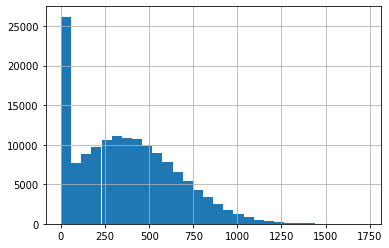

In [24]:
internet['mb_used'].hist(bins=30);

In [25]:
internet.query('mb_used == 0.0')['mb_used'].count() / internet.shape[0] * 100

13.13211082853701

Есть значения "0,00" и их доля в общем датафрейме чуть больше 13%. Если я все верно понимаю, при активной интернет-сессии трафик не может быть нулевым, строго говоря он идет даже если пользователь не входит в интернет от фоновой работы приложений телефона к примеру. Однако «Мегалайн» для веб-трафика отдельные сессии не считает. Вместо этого общая сумма за месяц округляется в бо́льшую сторону, а следовательно нулевые значения нам не помешают.

Дубликатов в данных из таблиц нет. Проверено методом `data.duplicated().sum()` по каждой таблице.

## Расчёты и добавление результатов в таблицу

Посчитаем для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [26]:
# добавим столбец месяца в таблицу звонков
calls['month'] = calls['call_date'].dt.month

# округляем время звонка согласно политике компании (в большую сторону)
calls['duration'] = np.ceil(calls['duration'])

# количество сделанных звонков и израсходованных минут разговора по месяцам 
calls_duration_month = (
    calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
)

# переименование колонок
calls_duration_month.columns = ['count_calls','calls_duration']
calls_duration_month.head(3)

count_calls  calls_duration
user_id month                             
1000    5.0             22           159.0
        6.0             43           172.0
        7.0             47           340.0

### Количество отправленных сообщений по месяцам

In [27]:
# добавим столбец месяца в таблицу сообщений
messages['month'] = messages['message_date'].dt.month

# количество отправленных сообщений по месяцам 
messages_count_month = (
    messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
)
messages_count_month.columns = ['count_messages']
messages_count_month.head(3)

count_messages
user_id month                
1000    5.0                22
        6.0                60
        7.0                75

### Объем израсходованного интернет-трафика по месяцам

In [28]:
# добавим столбец месяца в таблицу интернет-трафикa
internet['month'] = internet['session_date'].dt.month

# объем израсходованного интернет-трафика по месяцам 
mb_used_month = (
    internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
)
mb_used_month.columns = ['sum_mb_used']

# округляем трафик согласно политике компании (в большую сторону)
mb_used_month['sum_mb_used'] = np.ceil(mb_used_month['sum_mb_used'] / 1024) * 1024
mb_used_month.head(3)

sum_mb_used
user_id month             
1000    5.0         3072.0
        6.0        23552.0
        7.0        14336.0

### Сбор сводных таблиц с расчетами выше в один датафрейм для удобства визуализации и дальнейшей работы

In [29]:
users_df_by_month = calls_duration_month.join([messages_count_month, mb_used_month], how='outer')
users_df_by_month.head()

count_calls  calls_duration  count_messages  sum_mb_used
user_id month                                                          
1000    5.0           22.0           159.0            22.0       3072.0
        6.0           43.0           172.0            60.0      23552.0
        7.0           47.0           340.0            75.0      14336.0
        8.0           52.0           408.0            81.0      14336.0
        9.0           58.0           466.0            57.0      15360.0

In [30]:
users_df_by_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5.0) to (1499, 12.0)
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   count_calls     3174 non-null   float64
 1   calls_duration  3174 non-null   float64
 2   count_messages  2717 non-null   float64
 3   sum_mb_used     3203 non-null   float64
dtypes: float64(4)
memory usage: 130.4 KB


In [31]:
# наводим "красоту"
users_df_by_month = users_df_by_month.reset_index()

In [32]:
users_df_by_month.head()

,user_id,month,count_calls,calls_duration,count_messages,sum_mb_used
0,1000,5.0,22.0,159.0,22.0,3072.0
1,1000,6.0,43.0,172.0,60.0,23552.0
2,1000,7.0,47.0,340.0,75.0,14336.0
3,1000,8.0,52.0,408.0,81.0,14336.0
4,1000,9.0,58.0,466.0,57.0,15360.0


In [33]:
# объединяем с таблицей по данным пользователей
users_full_df = users.merge(users_df_by_month, on='user_id', how='outer')

# объединяем с таблицей по данным о тaрифах
users_full_df['tariff_name'] = users_full_df['tariff']
del users_full_df['tariff']
users_full_df = users_full_df.merge(tariffs, on='tariff_name')
users_full_df.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,month,count_calls,calls_duration,count_messages,sum_mb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,5.0,22.0,159.0,22.0,3072.0,ultra,1000,30720,3000,1950,150,1,1
1,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,6.0,43.0,172.0,60.0,23552.0,ultra,1000,30720,3000,1950,150,1,1
2,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,7.0,47.0,340.0,75.0,14336.0,ultra,1000,30720,3000,1950,150,1,1
3,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,8.0,52.0,408.0,81.0,14336.0,ultra,1000,30720,3000,1950,150,1,1
4,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,9.0,58.0,466.0,57.0,15360.0,ultra,1000,30720,3000,1950,150,1,1
5,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,10.0,57.0,350.0,73.0,15360.0,ultra,1000,30720,3000,1950,150,1,1
6,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,11.0,43.0,338.0,58.0,15360.0,ultra,1000,30720,3000,1950,150,1,1
7,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,12.0,46.0,333.0,70.0,10240.0,ultra,1000,30720,3000,1950,150,1,1
8,1003,23,-,Москва,Белла,Белякова,2018-08-17,8.0,55.0,380.0,37.0,9216.0,ultra,1000,30720,3000,1950,150,1,1
9,1003,23,-,Москва,Белла,Белякова,2018-08-17,9.0,134.0,961.0,91.0,13312.0,ultra,1000,30720,3000,1950,150,1,1


In [34]:
# проверяем пропуски
users_full_df.isna().sum()

user_id                    0
age                        0
churn_date                 0
city                       0
first_name                 0
last_name                  0
reg_date                   0
month                      2
count_calls               42
calls_duration            42
count_messages           499
sum_mb_used               13
tariff_name                0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

In [35]:
# заполняем пропуски
users_full_df['count_messages'] = users_full_df['count_messages'].fillna(0)
users_full_df['calls_duration'] = users_full_df['calls_duration'].fillna(0)
users_full_df['count_calls'] = users_full_df['count_calls'].fillna(0)
users_full_df['sum_mb_used'] = users_full_df['sum_mb_used'].fillna(0)
users_full_df.loc[243, 'month'] = users_full_df.loc[243, 'reg_date'].month
users_full_df.loc[2619, 'month'] = users_full_df.loc[2619, 'reg_date'].month

In [36]:
users_full_df.isna().sum()

user_id                  0
age                      0
churn_date               0
city                     0
first_name               0
last_name                0
reg_date                 0
month                    0
count_calls              0
calls_duration           0
count_messages           0
sum_mb_used              0
tariff_name              0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

In [37]:
# изменим тип данных для столбцов
columns_list = ['count_calls', 'calls_duration', 'count_messages', 'sum_mb_used', 'month']
for column in columns_list:
    users_full_df[column] =  users_full_df[column].astype('int')

### Помесячная выручка с каждого пользователя

In [38]:
# считаем 
def minuts(row):
    tot_minuts = row['minutes_included'] - row['calls_duration']
    if tot_minuts < 0:
        tot_minuts = abs(tot_minuts) * row['rub_per_minute']
        return tot_minuts
    if tot_minuts >= 0:
        return 0

tot_minuts = users_full_df.apply(minuts, axis=1)

def msgs(row):
    tot_msgs = row['messages_included'] - row['count_messages']
    if tot_msgs < 0:
        tot_msgs = abs(tot_msgs) * row['rub_per_message']
        return tot_msgs
    if tot_msgs >= 0:
        return 0

tot_msgs = users_full_df.apply(msgs, axis=1)

def intrnt(row):
    tot_intrnt = row['mb_per_month_included'] - row['sum_mb_used']
    if tot_intrnt < 0:
        tot_intrnt = (abs(tot_intrnt) / 1024) * row['rub_per_gb'] + row['rub_monthly_fee']
        return tot_intrnt
    if tot_intrnt >= 0:
        return row['rub_monthly_fee']

tot_intrnt = users_full_df.apply(intrnt, axis=1)

prof = tot_minuts + tot_msgs + tot_intrnt
users_full_df['profit'] = prof

In [39]:
# проверяем расчет по тарифу ultra
display(tariffs.query('tariff_name == "ultra"'))
users_full_df.query('tariff_name == "ultra"')[['calls_duration', 'count_messages', 'sum_mb_used', 'profit']].tail()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1,1000,30720,3000,1950,150,1,1,ultra


,calls_duration,count_messages,sum_mb_used,profit
981,92,13,3072,1950.0
982,813,82,33792,2400.0
983,1030,82,29696,1950.0
984,954,79,39936,3300.0
985,1031,84,23552,1950.0


Все верно. Там, где не превышен бесплатный лимит, в столбце `profit` отображена только сумма абонентской платы по тарифу (к примеру строка №981). А там, где лимит превышен, разница домножена на тариф сверх бесплатного лимита (к примеру строка № 982: звонки и сообщения укладываются в лимит, а интернет превышен). 

In [40]:
# проверяем расчет по тарифу smart
display(tariffs.query('tariff_name == "smart"'))
users_full_df.query('tariff_name == "smart"')[['calls_duration', 'count_messages', 'sum_mb_used', 'profit']].tail()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart


,calls_duration,count_messages,sum_mb_used,profit
3211,247,42,21504,1750.0
3212,70,11,2048,550.0
3213,449,48,18432,1150.0
3214,612,59,18432,1513.0
3215,492,66,13312,598.0


Все верно. Там, где не превышен бесплатный лимит в столбце `profit` отображена только сумма абонентской платы по тарифу (к примеру строка №3212). А там, где лимит превышен, разница домножена на тариф сверх бесплатного лимита (к примеру строка № 3214: превышены все три величины).

In [41]:
# переведем интернет-трафик в ГБ
users_full_df['sum_gb_used'] = users_full_df['sum_mb_used'] / 1024

# соберем нужные столбцы
full_df = users_full_df[['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'month', 'count_calls', 'calls_duration', 'count_messages',
       'sum_gb_used', 'tariff_name', 'profit']]

full_df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,month,count_calls,calls_duration,count_messages,sum_gb_used,tariff_name,profit
0,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,5,22,159,22,3.0,ultra,1950.0
1,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,6,43,172,60,23.0,ultra,1950.0
2,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,7,47,340,75,14.0,ultra,1950.0
3,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,8,52,408,81,14.0,ultra,1950.0
4,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,9,58,466,57,15.0,ultra,1950.0


In [42]:
full_df['tariff_name'].value_counts()

smart    2230
ultra     986
Name: tariff_name, dtype: int64

В выборке из 500 пользователей, тариф `smart` у 2230 человек и тариф `ultra` у 986 человек.

## Анализ данных

### Предварительный анализ тарифов

Посмотрим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы.

In [43]:
# вывод средних значений по тарифам в разрезе месяца, округлим до 2х знаков после запятой
mean_df = (
    round(full_df.pivot_table(index='month', columns='tariff_name',
                              values=['calls_duration', 'count_messages', 'sum_gb_used'],
                              aggfunc='mean'), 2)
)

In [44]:
# выведем месяц в столбец
mean_df = mean_df.reset_index()

In [45]:
mean_df

month calls_duration         count_messages        sum_gb_used  \
tariff_name                smart   ultra          smart  ultra       smart   
0               1         203.85  428.11          18.24  33.78        8.74   
1               2         298.69  297.12          24.09  21.96       11.84   
2               3         390.05  489.65          31.86  32.30       15.23   
3               4         367.13  458.02          30.74  31.56       13.62   
4               5         387.36  510.33          33.77  37.85       15.91   
5               6         395.64  479.70          33.40  41.73       15.95   
6               7         408.35  545.79          33.75  49.85       15.88   
7               8         421.47  510.78          33.64  48.44       16.74   
8               9         428.61  539.44          33.64  52.29       16.39   
9              10         426.14  558.08          33.77  58.43       16.88   
10             11         435.27  541.38          34.08  55.79       17.00   
11             12         477.14  588.57          35.89  60.18       18.15   

                    
tariff_name  ultra  
0            13.22  
1            12.00  
2            17.65  
3            16.96  
4            19.37  
5            18.94  
6            20.51  
7            19.60  
8            19.24  
9            20.07  
10           19.81  
11           21.59

In [46]:
std_var_df = full_df[['count_calls', 'calls_duration', 'sum_gb_used']]
# дисперсия
round(np.var(std_var_df), 2)

count_calls        1106.1
calls_duration    58592.4
sum_gb_used          54.9
dtype: float64

In [47]:
# стандартное отклонение
round(np.std(std_var_df), 2)

count_calls        33.26
calls_duration    242.06
sum_gb_used         7.41
dtype: float64

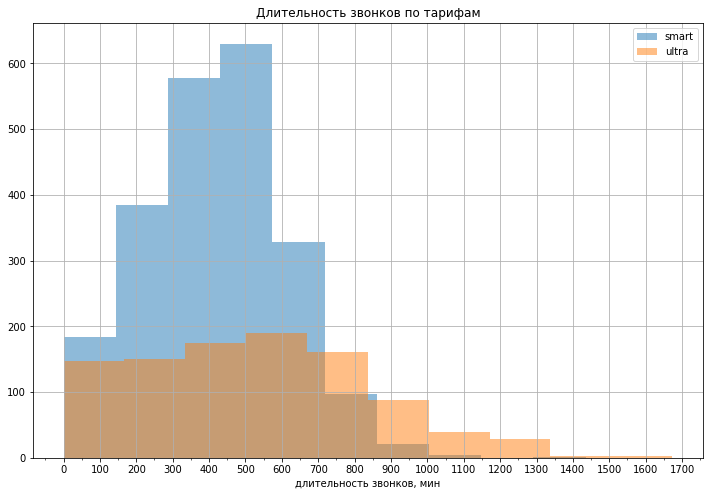

In [48]:
fig, calls_duration = plt.subplots()
calls_duration.hist(full_df.query('tariff_name == "smart"')['calls_duration'], alpha=0.5, label='smart')
calls_duration.hist(full_df.query('tariff_name == "ultra"')['calls_duration'], alpha=0.5, label='ultra')
calls_duration.set_title("Длительность звонков по тарифам")
calls_duration.set_xlabel('длительность звонков, мин')
calls_duration.legend()
calls_duration.grid()
calls_duration.xaxis.set_major_locator(ticker.MultipleLocator(100))
calls_duration.xaxis.set_minor_locator(ticker.MultipleLocator(50))
fig.set_figwidth(12)
fig.set_figheight(8)

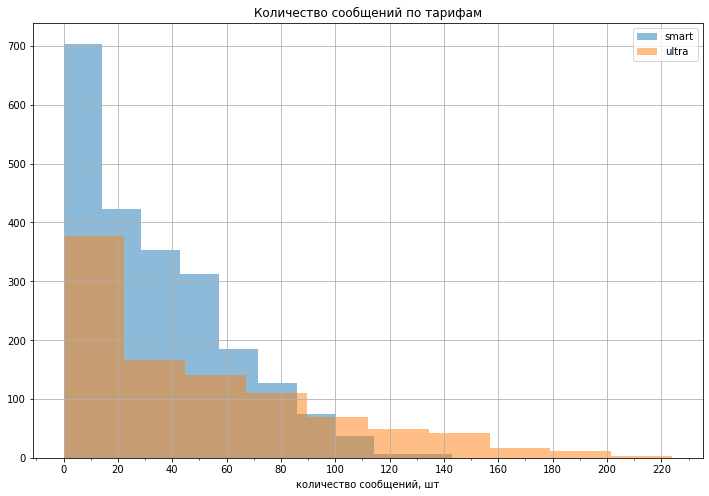

In [49]:
fig, count_messages = plt.subplots()
count_messages.hist(full_df.query('tariff_name == "smart"')['count_messages'], alpha=0.5, label='smart')
count_messages.hist(full_df.query('tariff_name == "ultra"')['count_messages'], alpha=0.5, label='ultra')
count_messages.set_title("Количество сообщений по тарифам")
count_messages.set_xlabel('количество сообщений, шт')
count_messages.legend()
count_messages.grid()
count_messages.xaxis.set_major_locator(ticker.MultipleLocator(20))
count_messages.xaxis.set_minor_locator(ticker.MultipleLocator(10))
fig.set_figwidth(12)
fig.set_figheight(8)

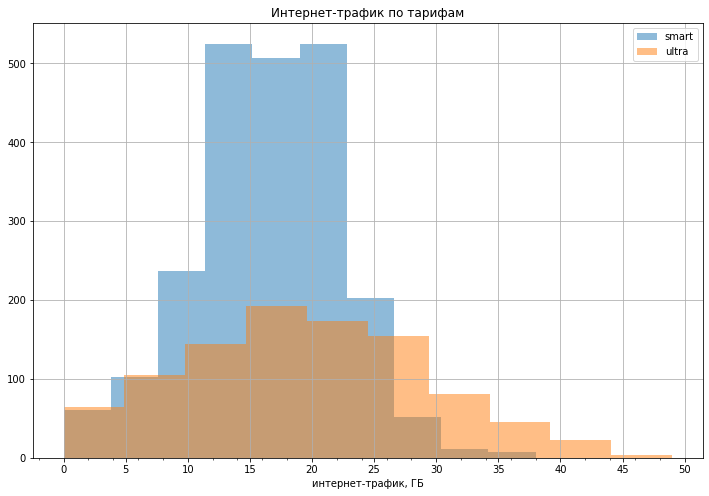

In [50]:
fig, sum_mb_used = plt.subplots()
sum_mb_used.hist(full_df.query('tariff_name == "smart"')['sum_gb_used'], alpha=0.5, label='smart')
sum_mb_used.hist(full_df.query('tariff_name == "ultra"')['sum_gb_used'], alpha=0.5, label='ultra')
sum_mb_used.set_title("Интернет-трафик по тарифам")
sum_mb_used.set_xlabel('интернет-трафик, ГБ')
sum_mb_used.legend()
sum_mb_used.grid()
sum_mb_used.xaxis.set_major_locator(ticker.MultipleLocator(5))
sum_mb_used.xaxis.set_minor_locator(ticker.MultipleLocator(2))
fig.set_figwidth(12)
fig.set_figheight(8)

In [51]:
mean_df.describe()

month calls_duration             count_messages             \
tariff_name                     smart       ultra          smart      ultra   
count        12.000000      12.000000   12.000000      12.000000  12.000000   
mean          6.500000     386.641667  495.580833      31.405833  43.680000   
std           3.605551      72.099984   76.977589       5.093690  12.267036   
min           1.000000     203.850000  297.120000      18.240000  21.960000   
25%           3.750000     382.302500  474.280000      31.580000  33.410000   
50%           6.500000     401.995000  510.555000      33.640000  45.085000   
75%           9.250000     426.757500  542.482500      33.770000  53.165000   
max          12.000000     477.140000  588.570000      35.890000  60.180000   

            sum_gb_used             
tariff_name       smart      ultra  
count         12.000000  12.000000  
mean          15.194167  18.246667  
std            2.621583   2.906570  
min            8.740000  12.000000  
25%           14.827500  17.477500  
50%           15.930000  19.305000  
75%           16.775000  19.875000  
max           18.150000  21.590000

<div style="border:solid green 1px; padding: 10px">

По тарифу `smart` минимальные значения по минутам разговора, сообщениям и интернет-трафику пришлись на январь 2018 года, а по тарифу `ultra` на февраль. Максимальные значения по двум тарифам совпали и пришлись на декабрь года.

На графиках видно, что значения по тарифу `ultra` дальше "сдвинуты" вправо, чем по `smart` .

Пик значений примерно приходится:

1. по тарифу  `smart`:

* звонки в промежутке  430-550 минут
* сообщения в промежутке  0-10 шт
* трафик в промежутке  12-15 ГБ

2. по тарифу  `ultra`:

* звонки в промежутке  550-650 минут
* сообщения в промежутке  0-20 шт
* трафик в промежутке  15-20 ГБ

### Проверка гипотез

#### Средняя выручка пользователей тарифов «Ультра» и «Смарт»

Нужно провести сравнение выручки по тарифам и понять различается ли она. Определим формулировку для нулевой и альтернативной гипотезы:

Нулевая гипотеза - средние выручки пользователей тарифов «Ультра» и «Смарт»  равны.

Альтернативная гипотеза - средние выручки пользователей тарифов «Ультра» и «Смарт» не равны.

Пороговое значение alpha - критический уровень статистической значимости , примем как 0,05 (5%). Если p-value окажется меньше него - отвергнем гипотезу. P-value — это вероятность ошибки при отклонении нулевой гипотезы.

Для проверки гипотез используем столбец `prоfit`, т.к. в нем сохранены значения выручки по Клиентам.

In [52]:
# проверка Но
alpha = 0.05
results = st.ttest_ind(
    full_df.query('tariff_name == "ultra"')['profit'], 
    full_df.query('tariff_name == "smart"')['profit']
)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  8.08190955548901e-161
Отвергаем нулевую гипотезу


In [53]:
# посчитаем на сколько различается сумма выручки
full_df.query('tariff_name == "smart"')['profit'].sum() - full_df.query('tariff_name == "ultra"')['profit'].sum()

834851.0

<div style="border:solid green 1px; padding: 10px">

Значение p-value 8.081909555489933e-161 - это практически 0, что говорит о том, что такое или большее различие практически не возможно получить случайно. Это дает возможность делать вывод о значимом различии в средней выручке пользователей по тарифам.

Суммарная выручка за год по тарифу "Смарт" почти на 835 тысяч больше чем по тарифу "Ультра".

Мы не использовали дополнительный параметр `equal_var = False`, потому что у нас достаточно большие и примерно одинаковые по размеру выборки, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

#### Средняя выручка пользователей из Москвы и других регионов

Нужно провести сравнение выручки в разрезе локации пользователей и понять различается ли она. Определим формулировку для нулевой и альтернативной гипотезы:

Нулевая гипотеза - средняя выручка пользователей из Москвы и пользователей из других регионов равны.

Альтернативная гипотеза - средняя выручка пользователей из Москвы и пользователей из других регионов не равны.

Пороговое значение alpha - критический уровень статистической значимости , примем как 0,05 (5%). Если p-value окажется меньше него - отвергнем гипотезу. P-value — это вероятность ошибки при отклонении нулевой гипотезы.

Для проверки гипотез используем столбец `prоft`, т.к. в нем сохранены значения выручки по Клиентам.

In [54]:
full_df = full_df.reset_index(drop=True)

In [55]:
# группировка по городу
def city_group(city):
    if city == 'Москва':
        return 'Москва'
    return 'Другой регион'

full_df['city_group'] = full_df['city'].apply(city_group)

In [56]:
# проверка Но
results = st.ttest_ind(
    full_df.query('city_group == "Москва"')['profit'], 
    full_df.query('city_group != "Москва"')['profit'])
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


In [57]:
# посчитаем на сколько различается сумма выручки
full_df.query('city_group != "Москва"')['profit'].sum() - full_df.query('city_group == "Москва"')['profit'].sum()

3026867.0

In [58]:
# посчитаем на сколько различается сумма выручки по тарифу smart/ultra москвичей
(full_df.query('city_group == "Москва" and tariff_name == "smart"')['profit'].sum()
 - full_df.query('city_group == "Москва" and tariff_name == "ultra"')['profit'].sum())

11742.0

In [59]:
# посчитаем на сколько различается сумма выручки по тарифу smart/ultra не москвичей
(full_df.query('city_group != "Москва" and tariff_name == "smart"')['profit'].sum()
 - full_df.query('city_group != "Москва" and tariff_name == "ultra"')['profit'].sum())

823109.0

<div style="border:solid green 1px; padding: 10px">

Полученное значение p-value говорит о том, что хотя средняя выручка пользователей из других регионов и из Москвы неодинакова, с вероятностью чуть больше 54% (что составляет больше половины случаев) такое или большее различие можно получить случайно.Такая вероятность случайно получить различие в значениях показателя, дает возможсть задуматься о возможном значимом различии в средней выручке пользователей из Москвы и из других регионов.

Суммарная выручка за год пользователей из других регионов превышает выручку пользователей из Москвы на 3 026 867,00. При этом и у пользователей из других регионов, и у пользователей из Москвы, по тарифу "Смарт" выручка больше чем по тарифу "Ультра" (на 823 109,00 и 11 742,00 соотвественно). 

Мы не использовали дополнительный параметр `equal_var = False`, потому что у нас достаточно большие и примерно одинаковые по размеру выборки, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

## <font color='green'>Общий вывод</font>

<div style="border:solid green 2px; padding: 20px">

    
Мы изучили выборку за 2018 год из 500 пользователей Компании «Мегалайн» для того чтобы скорректировать рекламный бюджет. Нужно было понять какой тариф приносит больше денег. Клиентам предлагается два тарифных плана: «Смарт» и «Ультра», также выборка содержит количество использованных минут разговора, отправленных сообщений и потраченного интернет-трафика и данные самих пользователях, такие как возвраст, город, дата начала/окончания пользования тарифом и пр.

    
Был проверен ряд параметров и выявлено, что база содержит куда больше данных по количеству пользователей тарифа "Смарт" чем по тарифу "Ультра", самым "не общительным" месяцем в году по тарифу "Смарт" стал январь, а по тарифу "Ультра" - февраль, а больше всего говорили, писали и выходили в интернет по двум тарифам в декабре.
    
В целом значения у тарифа "Ультра" больше, чем у тарифа "Смарт", это может говорить о том, что этот тариф предпочитают те пользователи, которым не хватает предлагаемого количества услуг из тарифа "Смарт".    

Пик значений приходится, примерно:

1. по тарифу  `smart`:

* звонки в промежутке  430-550 минут
* сообщения в промежутке  0-10 шт
* трафик в промежутке  12-15 ГБ
    
2. по тарифу  `ultra`:

* звонки в промежутке  550-650 минут
* сообщения в промежутке  0-20 шт
* трафик в промежутке  15-20 ГБ    
    
Однако по тарифу "Смарт" общее число пользователей, согласно выборке, больше чем у тарифа "Ультра": 2230 человек и 986 человек.
    
Были проверены две гипотезы и установлено, что:
    
* Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Суммарная выручка за год по тарифу "Смарт" почти на 835 тысяч больше чем по тарифу "Ультра".
* Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Суммарная выручка за год пользователей из других регионов превышает выручку пользователей из Москвы на 3 026 867,00. При этом и у пользователей из других регионов, и у пользователей из Москвы, по тарифу "Смарт" выручка больше чем по тарифу "Ультра" (на 823 109,00 и 11 742,00 соотвественно). 
    
Итак, чтобы скорректировать рекламный бюджет следует принять во внимание, что в среднем по тарифу "Ультра" пользователи тратят больше минут на разговоры, пишут больше сообщений и тратят больше интернет-трафика, но таких пользователей меньше, большей популярностью пользуется тариф "Смарт". Он приносит больше денег вне зависимости от региона. </div>